In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style = "darkgrid")

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips["total_bill"].max()

50.81

In [6]:
tips["tip"].max()

10.0

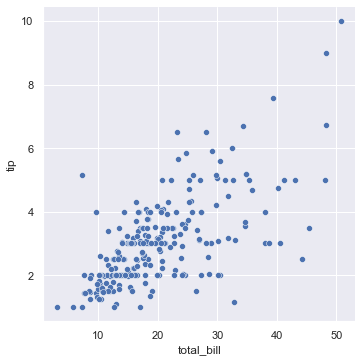

In [7]:
# plt.figure(figsize = (40,10))
sns.relplot(x = "total_bill" , y = "tip" , data = tips)
# plt.show()

<Figure size 6480x6480 with 0 Axes>

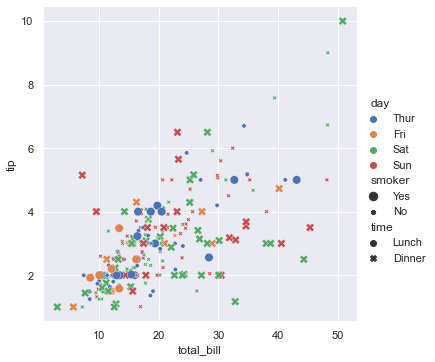

In [8]:
plt.figure(figsize = (90,90))
sns.relplot(x = "total_bill" , y = "tip" , data = tips,hue="day",style = "time",size =  "smoker")
plt.show()

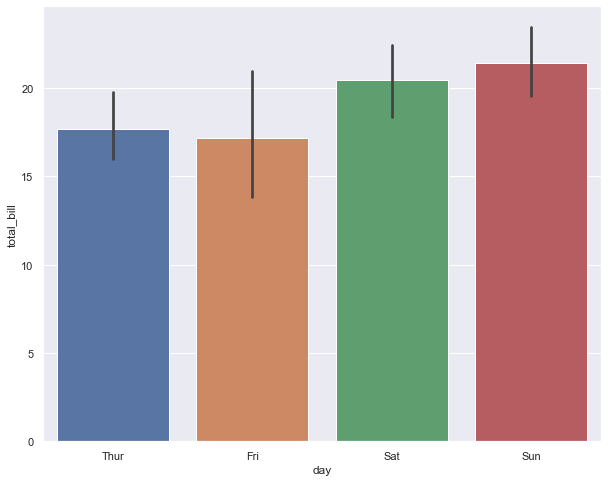

In [9]:
plt.figure(figsize = (10,8))
sns.barplot(x = "day" , y = "total_bill" , data = tips)
plt.show()

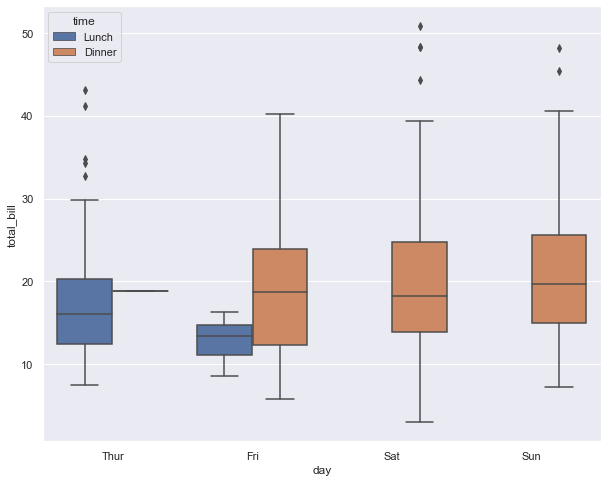

In [10]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "day" , y = "total_bill" ,hue = "time", data = tips)
plt.show()

In [11]:
tips[["time","day"]].value_counts()

time    day 
Dinner  Sat     87
        Sun     76
Lunch   Thur    61
Dinner  Fri     12
Lunch   Fri      7
Dinner  Thur     1
dtype: int64

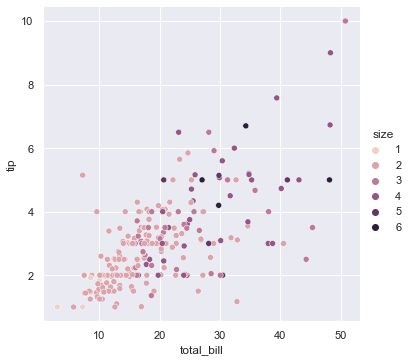

In [12]:
# plt.figure(figsize = (90,90))
sns.relplot(x = "total_bill" , y = "tip" , data = tips,hue="size")
# plt.show()

In [13]:
from numpy.random import randn

In [14]:
df = pd.DataFrame(dict(time = np.arange(500),value = randn(500).cumsum()))

In [15]:
df

,time,value
0,0,0.485363
1,1,-0.634792
2,2,-1.570311
3,3,-2.157495
4,4,-2.012211
...,...,...
495,495,-3.951140
496,496,-3.540194
497,497,-2.038968
498,498,-3.405195


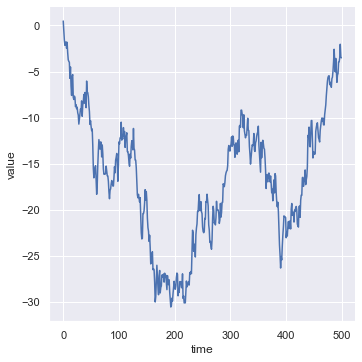

In [16]:
sns.relplot(x = "time", y = "value",kind = "line",data = df,sort = True)

In [17]:
df = pd.DataFrame(dict(time=pd.date_range("2019-06-02",periods = 500),value = randn(500)))

In [18]:
df.head()

,time,value
0,2019-06-02,0.439688
1,2019-06-03,0.128064
2,2019-06-04,1.825655
3,2019-06-05,0.678378
4,2019-06-06,0.027781


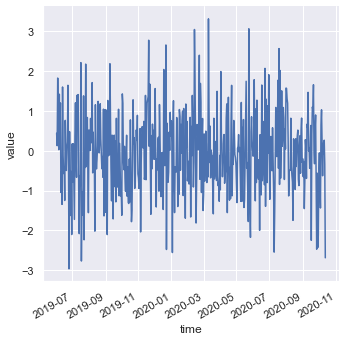

In [19]:
g = sns.relplot(x = "time",y = "value",kind = "line",data =df)
g.fig.autofmt_xdate()

# New DATA SET


In [20]:
fmri=sns.load_dataset("fmri")

In [21]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [22]:
fmri["region"].unique()

array(['parietal', 'frontal'], dtype=object)

In [23]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [24]:
fmri["event"].unique()

array(['stim', 'cue'], dtype=object)

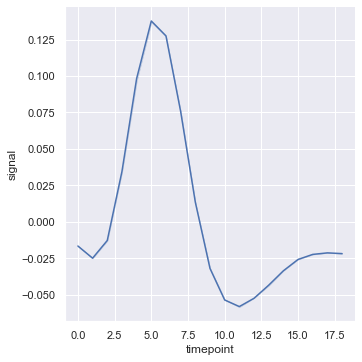

In [25]:
sns.relplot(x = "timepoint",y="signal",kind = "line",data=fmri,ci=False)

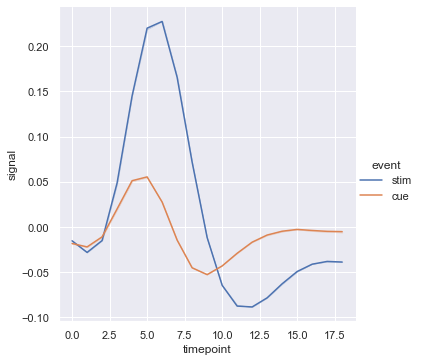

In [26]:
sns.relplot(x = "timepoint",y="signal",hue = "event",kind = "line",data=fmri,ci=False)

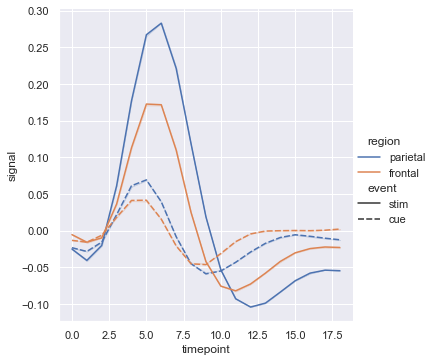

In [27]:
sns.relplot(x = "timepoint",y="signal",hue = "region",style = "event",kind = "line",data=fmri,ci=False)

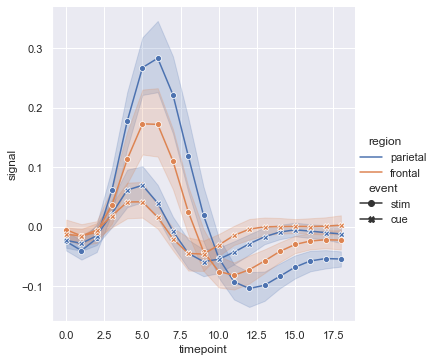

In [28]:
sns.relplot(x = "timepoint",y="signal",hue = "region",style = "event",kind = "line",markers = True,dashes = False,data=fmri)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

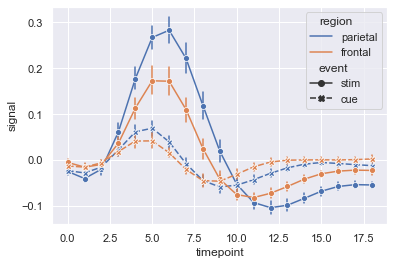

In [29]:
sns.lineplot(x = "timepoint",y="signal",hue = "region",style = "event",markers = True,ci = 68,err_style="bars",data=fmri)

# Categorical  Data Ploting


In [30]:
tips = sns.load_dataset("tips")

In [31]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


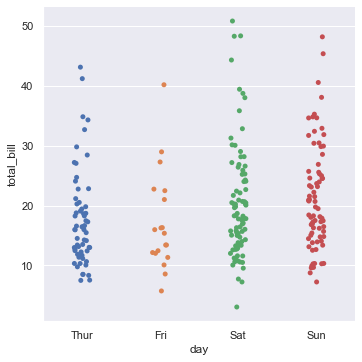

In [32]:

sns.catplot(x = "day",y= "total_bill",data=tips)


In [33]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


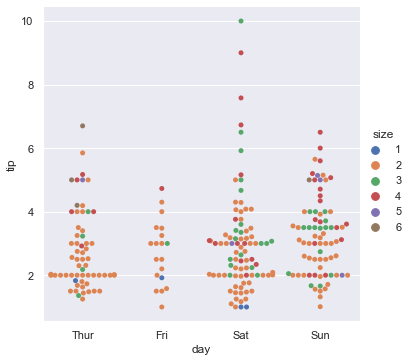

In [34]:
sns.catplot(x = "day",y= "tip",data=tips,kind = "swarm",hue= "size")

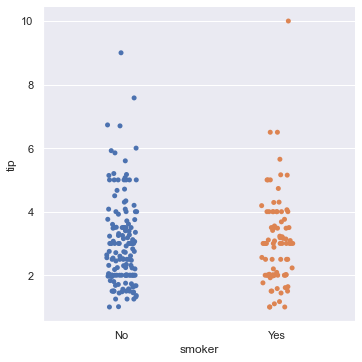

In [35]:
sns.catplot(x="smoker",y="tip",data = tips,order = ["No","Yes"])

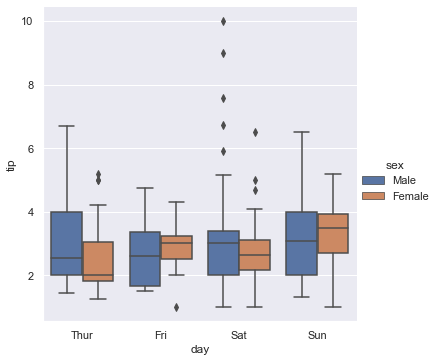

In [36]:
sns.catplot(x= "day",y = "tip",kind = "box",data=tips,hue = "sex")

In [37]:
diamonds= sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


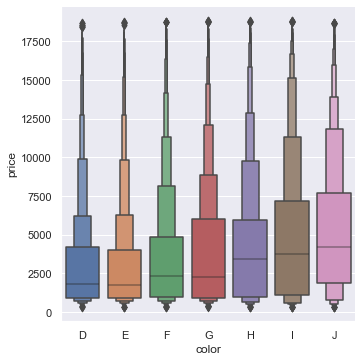

In [38]:
sns.catplot(x = "color",y = "price",kind = "boxen",data = diamonds.sort_values("color"))

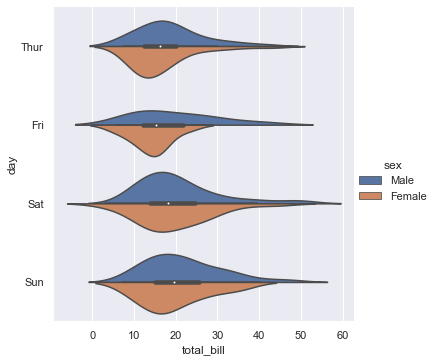

In [39]:
sns.catplot(x="total_bill",y = "day",hue = "sex",kind = "violin",split= True,data=tips)

 # VISUALIZATION  DISTRIBUTION OF DATA
 

In [41]:
x = np.random.randn(100)
x

array([-1.36701017,  0.74352576, -1.65472313,  0.06524368, -0.46139222,
        2.18982866, -0.16464351,  0.04450446, -1.3634777 ,  0.27667268,
        1.02179149,  2.43154095, -1.2302816 , -0.77777219,  0.51755064,
        1.52129074,  0.9802361 , -1.19054981, -0.42752636,  0.01520004,
       -0.16899025, -0.26846276, -1.32078618, -0.2940058 ,  2.18244189,
       -0.42643273,  1.39369504,  0.21254478,  0.43662843,  0.8669432 ,
       -0.3996549 , -0.73872301, -0.21217173,  0.01098852,  0.28979925,
       -0.20661516,  0.70980883, -1.24512775,  1.69635576, -2.79811051,
        0.7061106 , -1.21218289,  0.19752902, -0.78109351,  2.17573181,
        1.08406347, -0.13009304, -0.52669553, -0.24376996,  1.17032623,
       -0.8830431 ,  0.12119664,  1.875727  , -0.22090492, -0.2285207 ,
       -0.32990772,  1.09611931,  1.26148205, -0.61931671, -0.21948239,
        0.10866135,  0.25723717, -0.04424777,  1.06455446,  0.53650425,
       -0.03038552, -1.46144971, -0.67511885,  0.7827343 ,  0.07

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

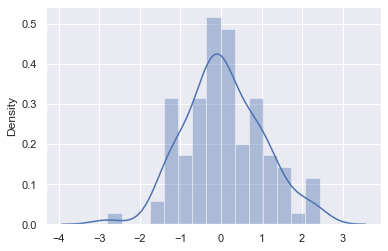

In [43]:
sns.distplot(x,kde = True,hist = True,rug = False,bins= 15)

In [44]:
tips.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

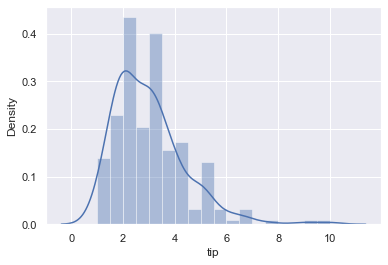

In [45]:
sns.distplot(tips["tip"],kde =True)

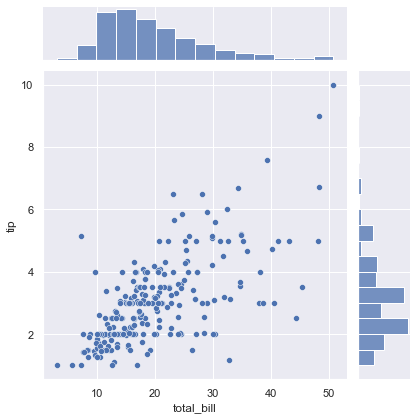

In [46]:
sns.jointplot(x = tips["total_bill"],y = tips["tip"])